###*Librerías:*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial import ConvexHull
import scipy.cluster.hierarchy as shc
from scipy import interpolate



In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
path_data = '/content/gdrive/MyDrive/AprendizajeAutomatico/Proyecto2/Dataset/'

 ## 1) Cargar y Analizar datos 

In [6]:
df_X = pd.read_csv(path_data + "dataset_tissue.txt",header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df_y = pd.read_csv(path_data + "clase.txt")

In [8]:
df_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189
0,NaN,GSM11805.CEL.gz,GSM11814.CEL.gz,GSM11823.CEL.gz,GSM11830.CEL.gz,GSM12067.CEL.gz,GSM12075.CEL.gz,GSM12079.CEL.gz,GSM12098.CEL.gz,GSM12105.CEL.gz,GSM12268.CEL.gz,GSM12270.CEL.gz,GSM12283.CEL.gz,GSM12298.CEL.gz,GSM12300.CEL.gz,GSM12399.CEL.gz,GSM12444.CEL.gz,GSM21203.cel.gz,GSM21204.cel.gz,GSM21205.cel.gz,GSM21206.cel.gz,GSM21207.cel.gz,GSM21208.cel.gz,GSM21209.cel.gz,GSM21210.cel.gz,GSM21212.cel.gz,GSM21213.cel.gz,GSM21214.cel.gz,GSM21215.cel.gz,GSM21216.cel.gz,GSM21217.cel.gz,GSM21218.cel.gz,GSM21219.cel.gz,GSM21220.cel.gz,GSM21221.cel.gz,GSM21222.cel.gz,GSM21223.cel.gz,GSM21224.cel.gz,GSM21225.cel.gz,GSM21226.cel.gz,...,GSM296876.CEL.gz,GSM296878.CEL.gz,GSM296879.CEL.gz,GSM296880.CEL.gz,GSM296881.CEL.gz,GSM296882.CEL.gz,GSM296883.CEL.gz,GSM296886.CEL.gz,GSM296887.CEL.gz,GSM296888.CEL.gz,GSM296889.CEL.gz,GSM296890.CEL.gz,GSM296891.CEL.gz,GSM296892.CEL.gz,GSM298747.CEL.gz,GSM298748.CEL.gz,GSM298749.CEL.gz,GSM298750.CEL.gz,GSM299110.CEL.gz,GSM299111.CEL.gz,GSM299112.CEL.gz,GSM299113.CEL.gz,GSM299244.CEL.gz,GSM299245.CEL.gz,GSM299246.CEL.gz,GSM299247.CEL.gz,GSM322969.CEL.gz,GSM323054.CEL.gz,GSM323523.CEL.gz,GSM323524.CEL.gz,GSM323527.CEL.gz,GSM323565.CEL.gz,GSM323566.CEL.gz,GSM323567.CEL.gz,GSM246492.CEL.gz,GSM246493.CEL.gz,GSM246494.CEL.gz,GSM307639.CEL.gz,GSM307640.CEL.gz,GSM307641.CEL.gz
1,1007_s_at,10.1912666822211,10.5091673351314,10.2720269492085,10.2529517194729,10.1576049232494,9.96678172954019,9.83934832974126,9.94565197248459,9.91303106658949,10.1703442352627,9.45741516459495,10.1268870842942,10.4664257211086,9.96973019146674,10.5121768610885,9.95450017020545,11.1661182948376,10.9193004184946,11.0678993819025,11.1575067884347,11.3909872514754,10.8893268779711,11.6674305963941,11.2224508965785,11.8980275522044,11.4005381634261,10.9554282879219,10.3613396030431,10.7713015923524,10.2729775883915,10.7577343093115,11.3710138413383,10.9145143242311,10.5733162818254,11.226524954963,11.2434148575111,11.5752925740283,11.439543606024,11.0091200286927,...,9.7438553491072,10.6268250644816,10.1869270411132,10.508279820866,10.1598762431507,10.0139876125165,10.3438273905478,9.42615024691931,9.73275319677367,9.50555151244813,9.48949624814516,9.66996618355174,9.47732823312598,9.64515835633352,8.43069217011524,8.36249162745909,8.74633699086119,8.28093335458315,8.43069217011524,8.74633699086119,8.28093335458315,8.36249162745909,8.60128453049111,8.71478700428553,8.70964489940597,8.60003322411806,11.9203168072586,11.9199308840961,11.7475581422531,11.8050230447292,11.7977429508911,10.0408856560396,11.2850015141002,9.88869303106195,9.66112701032859,9.80368609168733,10.509541139819,9.98450196102648,9.937738353465,10.3067812624519
2,1053_at,6.04046250272039,6.69607547976383,6.14466254544271,6.57515280822761,6.60670108954106,6.06006947550896,6.18659649538593,5.92786079541114,6.33747800246302,6.04578949020755,6.28045680584742,5.8820250788601,6.20386428735536,5.98704584004713,6.44974762857492,6.16135361316097,5.85341425533468,5.66195051704774,5.78546301937077,5.83184640502122,5.92485231935363,5.65269599858264,5.7851899513821,5.71290616500019,5.67639701767653,5.67604572437136,5.77678078055937,5.66363352615535,5.79195544541786,5.71326568521361,5.98417045362349,5.73676794239041,5.85033237854461,5.84452802265255,5.82092891956222,5.76844652528373,5.87493462673938,5.9852946946925,5.75032209199468,...,6.06864996117201,6.11387494679427,6.10892396598725,6.19370418739918,6.30362481201124,5.97965772050543,6.11515935415871,6.22104762390989,5.88796174145619,5.9737764677932,6.04511253628362,5.85342634904806,6.11278451975375,6.1587456318772,5.84538275566591,6.07283729777204,6.00484726702444,6.16278103988501,5.84538275566591,6.00484726702444,6.16278103988501,6.07283729777204,6.04947854654

In [9]:
df_y["label"] = df_y.x
tissue = {'kidney': 0,'hippocampus': 1, 'cerebellum':2, 'colon':3, 'liver':4, 'endometrium':5 , 'placenta':6}
df_y.label = [tissue[item] for item in df_y.x]

In [10]:
df_y

,Unnamed: 0,x,label
0,1,kidney,0
1,2,kidney,0
2,3,kidney,0
3,4,kidney,0
4,5,kidney,0
...,...,...,...
184,185,placenta,6
185,186,placenta,6
186,187,placenta,6
187,188,placenta,6


In [11]:
df = df_X.T
df.columns = df.iloc[0] 
df = df[1:]

In [12]:
df.head()

,NaN,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,...,65472_at,65493_at,65517_at,65521_at,65585_at,65588_at,65591_at,65630_at,65635_at,65718_at,65770_at,65884_at,66053_at,71933_at,74694_s_at,76897_s_at,77508_r_at,78047_s_at,78330_at,78383_at,78495_at,79005_at,81737_at,81811_at,823_at,87100_at,89476_r_at,89948_at,89977_at,90265_at,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
1,GSM11805.CEL.gz,10.1912666822211,6.04046250272039,7.44740927631719,12.0250418580982,5.26926852837967,8.5351755175356,6.92169017840876,5.71818950197561,8.08207586251632,5.4343038591494,7.03732332778038,8.84582506918152,7.60099267048579,11.2507743582067,10.2924919148508,8.89140257310956,6.36719901709473,5.58498342540445,10.138549844734,5.96226772625265,9.74133872599839,11.0483422206484,12.2840256481627,12.8500641392536,12.2985509796135,11.3352621737399,12.0026701387003,12.2720619870904,7.61463542406428,11.540988391386,12.2614929565085,10.4004907976329,13.2253005548735,12.6910777751019,10.9046993196314,11.9405137831795,13.0309379340867,12.6433006178978,13.0946641694015,...,5.3821,6.23802,8.61315,9.02314,8.2739,7.31596,8.78746,6.54297,10.5587,6.88092,9.96513,8.02107,5.35623,9.02535,8.10833,4.55466,10.0045,10.676,6.89269,7.39145,7.77419,8.96205,6.6538,7.93684,8.41055,4.85809,8.53107,8.14928,7.45812,9.82205,8.10842,5.25107,7.09866,8.2104,7.73674,6.43485,5.70045,9.21116,8.33913,7.3678
2,GSM11814.CEL.gz,10.5091673351314,6.69607547976383,7.77535403522073,12.0078171043575,5.18038911358425,8.587241289342,6.96242995259997,5.59604207468944,7.56817804399081,5.2813193697471,7.05400294364185,8.49772641709013,7.47070823898123,10.8564846368388,10.4523359145761,9.65900175812274,6.49979865835175,5.49357369374885,10.2584042694331,6.52555089221627,10.1911409721214,11.9483578329762,12.7831018647484,13.3930857382224,12.0530112310463,10.9901129851467,11.7930395233171,11.6322444978387,9.36705094009866,11.7433101730443,12.5017872160544,10.384815347749,13.0189303155303,12.9760009971139,10.8257072228674,11.7622316671911,12.7942979299463,12.47605514254,13.0321616459517,...,5.3577,6.41995,8.05033,9.15007,8.16858,8.03976,8.90324,6.45544,11.0141,6.97063,10.178,9.20602,5.35626,8.98624,8.55437,4.73717,10.1528,10.6481,7.06716,7.13983,7.98845,8.68649,6.75585,8.24048,8.80185,5.00997,9.23404,8.15132,7.92987,10.1756,8.07281,5.40934,6.90583,8.32251,8.19208,7.67699,6.56648,9.41598,8.21443,7.91775
3,GSM11823.CEL.gz,10.2720269492085,6.14466254544271,7.69623476959699,11.6332792792521,5.30171442164641,8.27741390907574,7.05463287965406,5.57695175207051,7.13647372065342,5.28291624691961,7.33172843621136,9.28976819209627,7.87383637235041,11.0291715579688,10.4522400391069,8.62693598765211,6.41503438883049,5.62496993527305,10.6710118674441,6.78180639520215,10.0053761305511,11.627641347933,12.1475916136576,12.2036363690083,12.2070912294417,10.6235753095137,11.9056864679966,12.3589601239659,9.61526690737048,11.5143577203625,12.2911657675556,10.3775267360705,13.2521033476723,12.5225695529831,10.5133558363664,11.2751206659767,12.9040301109747,12.6717827830881,12.9360637290597,...,5.27198,5.89561,9.21733,9.12758,8.61605,6.64352,9.24899,6.32881,10.9258,6.49601,10.2157,8.02773,5.2879,9.27777,6.75011,4.61444,10.3816,10.8019,7.19728,7.38758,7.47847,8.67063,6.31275,7.48826,7.91186,5.07638,9.18561,8.54856,8.17531,10.2586,7.80969,5.29768,6.71854,8.40471,7.9619,6.425,5.64128,8.19291,8.4561,7.59846
4,GSM11830.CEL.gz,10.2529517194729,6.57515280822761,8.47813486959629,11.0752858549853,5.37223512307381,8.60364959947184,7.11506741604452,5.86055078404275,8.6050906919614,5.37539149682214,7.56547796928126,9.01525522834794,7.89077328926688,11.2428297037025

In [13]:
X = df.iloc[:,1:]

In [13]:
X.describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,200019_s_at,...,65472_at,65493_at,65517_at,65521_at,65585_at,65588_at,65591_at,65630_at,65635_at,65718_at,65770_at,65884_at,66053_at,71933_at,74694_s_at,76897_s_at,77508_r_at,78047_s_at,78330_at,78383_at,78495_at,79005_at,81737_at,81811_at,823_at,87100_at,89476_r_at,89948_at,89977_at,90265_at,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
count,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,189,...,189.000000,189.00000,189.00000,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000
unique,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,...,185.000000,185.00000,185.00000,185.000000,185.000000,185.00000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.0000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.00000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.00000,185.000000
top,8.36249162745909,5.84538275566591,7.44133616608243,10.4078735276488,5.25702974586663,8.49564053051654,6.87024074606551,5.70122946558686,7.52894381591386,9.73553386772914,7.04391707112948,8.12431349357797,10.5374903558616,10.6171107294713,10.4009885220533,9.30613428552619,6.59172938794191,5.43871265361861,10.6841997205425,6.99560793505583,9.69180817031422,10.7246337806303,12.39735249782,12.4845025237322,11.5796307439075,9.62541702401008,11.875552987322,11.8803906195982,11.0058470605243,11.547778437857,12.0690916882258,8.45796487114884,12.6920961134697,11.9990034320853,10.3646140038054,10.4610865903776,12.2753344024702,11.5720659773191,12.405447194466,12.3570972536407,...,5.214277,5.90312,7.76931,9.347003,7.641716,7.18934,8.545026,6.407212,10.811261,6.479463,10.043745,8.404753,5.260522,7.990333,5.7959,4.580025,10.268362,10.245913,6.914682,6.880791,7.571675,8.457493,6.399979,7.554416,6.76997,5.690332,9.752793,7.995893,9.822159,9.955259,7.578871,5.540149,6.689905,8.018022,8.415041,7.541678,5.903746,7.420331,8.07467,7.950923
freq,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2.000000,2.00000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000


In [14]:
X_standardized = StandardScaler().fit_transform(X)

In [15]:
print(X_standardized.shape)
print(np.mean(X_standardized),np.std(X_standardized))

(189, 22215)
1.860704104948942e-18 1.0


In [16]:
X_standardized

array([[-0.08394318, -0.26896386, -0.66877899, ...,  2.36828885,
        -0.7437041 , -1.39344865],
       [ 0.28756536,  2.07429885, -0.09167218, ...,  2.73742686,
        -1.00699415,  0.00883984],
       [ 0.01043577,  0.10346329, -0.23090376, ...,  0.53311048,
        -0.49675351, -0.80529805],
       ...,
       [-0.32557484,  2.14545647, -1.24354797, ...,  1.54408879,
        -0.70876003, -0.01674819],
       [-0.38022424,  2.57505219, -1.23471674, ...,  0.53784596,
        -0.21543834, -0.73030421],
       [ 0.05105073,  3.25188256, -0.7387927 , ...,  2.74923947,
        -0.75457855,  0.36275341]])

In [17]:
print(df_y.groupby('label')['x'].count())
y_test = np.array(df_y.iloc[:,2:3]).reshape(1,-1)[0]
print(y_test)

label
0    39
1    31
2    38
3    34
4    26
5    15
6     6
Name: x, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 0 0 0 4 4 4 0 0 0 4 4 4 0 0 2 1 4 4 4 4 4 4 2 2 4 4 0 0
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 6 6
 6 6 6 6]


Visualizando los clusters de las etiquetas de entrada usando PCA con 2 componentes 

In [18]:
n_components=2
pca_c2 = PCA(n_components=n_components)
X_reduced_c2 = pca_c2.fit_transform(X_standardized)

In [19]:
print('Variacion individual de {} principal components:'.format(n_components))
print('{}'.format(np.round(pca_c2.explained_variance_ratio_, decimals=4)*100))
print('Variacion acumulada de {} principal components:'.format(n_components))
print('{}'.format(np.cumsum(np.round(pca_c2.explained_variance_ratio_, decimals=4)*100)))

Variacion individual de 2 principal components:
[19.51 12.33]
Variacion acumulada de 2 principal components:
[19.51 31.84]


In [20]:
df_reduced_test = pd.DataFrame(data = X_reduced_c2, columns = ['principal component 1', 'principal component 2'])
df_reduced_test["y"] = y_test

In [21]:
df_centroid_test = pd.DataFrame()
for i in np.unique(y_test):
  points_of_cluster_0 = df_reduced_test[df_reduced_test["y"]==i]
  centroid_of_cluster_0 = np.mean(points_of_cluster_0, axis=0) 
  dfc = pd.DataFrame(centroid_of_cluster_0)
  dfc = dfc.T
  dfc["y"] = int(dfc["y"])
  df_centroid_test = pd.concat([df_centroid_test,dfc])

print(df_centroid_test)

   principal component 1  principal component 2  y
0              27.391265             -29.390960  0
0             -70.690523              31.973638  1
0             -76.674141              28.320667  2
0              35.966951             -20.605050  3
0              91.991506              28.629035  4
0               9.104235             -38.984061  5
0              47.590871             -63.357154  6


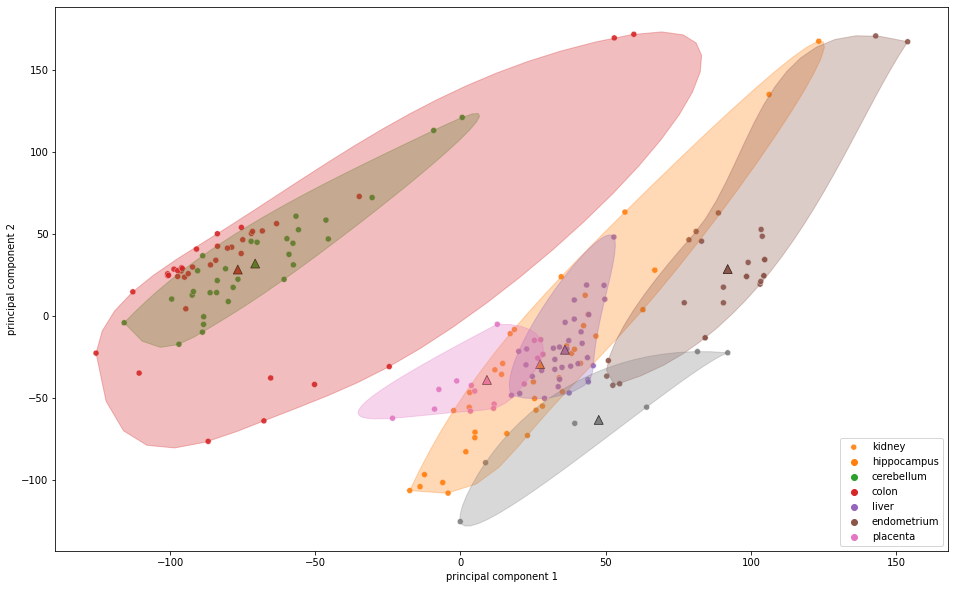

In [22]:
plt.figure(figsize=(16,10))
color_pal = sns.color_palette("tab10", len(np.unique(y_test))+1)[1:8]
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=color_pal,
    data=df_reduced_test,
    legend="full",
    alpha=0.9
)

ax = sns.scatterplot(x="principal component 1", y="principal component 2", 
                     hue="y", palette=color_pal, data=df_centroid_test, s=80, 
                     ec='black', legend=False, ax=ax, marker='^', alpha=1)

ax.legend(labels=['kidney', 'hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium', 'placenta'])

for i in df_reduced_test.y.unique():
    points = df_reduced_test[df_reduced_test.y == i][['principal component 1', 'principal component 2']].values
    
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)

    if i>=0:
      plt.fill(interp_x, interp_y, '--', alpha=0.3, color=color_pal[i])

plt.show()

In [23]:
score_dbsacn_s = silhouette_score(X, y_test, metric='euclidean')
score_dbsacn_d = davies_bouldin_score(X, y_test)
print('Silhouette Coefficient: %.4f' % score_dbsacn_s)
print('DB Index: %.4f' % score_dbsacn_d)

Silhouette Coefficient: 0.3142
DB Index: 1.3151


# 3. Investigar sobre el Agglomerative Hierarchical Clustering 

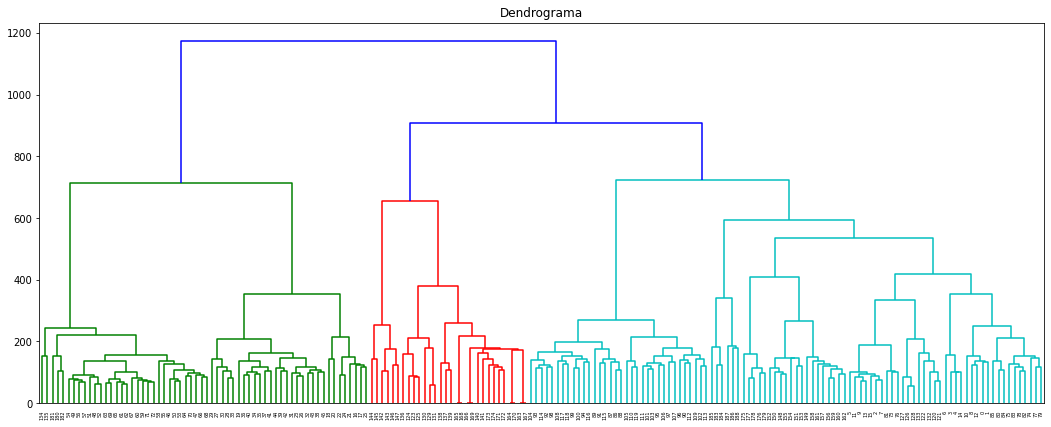

In [24]:
plt.figure(figsize=(18, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(X_standardized, method='ward'))

In [25]:
model_AggClus = AgglomerativeClustering(n_clusters=7)
yAggClus = model_AggClus.fit(X_standardized)
yAggClus_2 = model_AggClus.fit_predict(X_standardized)
clusters = np.unique(yAggClus_2)
print(clusters)

[0 1 2 3 4 5 6]


Uniformizando ID de cada cluster

In [26]:
df_y_AggClus = pd.DataFrame(data = yAggClus_2, columns = ['pred'])
df_y_AggClus["label"] = ""
tissue = {0:'kidney',2:'hippocampus', 4:'cerebellum', 3:'colon', 1:'liver', 5:'endometrium' , 6:'placenta'}
df_y_AggClus.label = [tissue[item] for item in df_y_AggClus.pred]
tissue = {'kidney': 0,'hippocampus': 1, 'cerebellum':2, 'colon':3, 'liver':4, 'endometrium':5 , 'placenta':6}
df_y_AggClus.pred = [tissue[item] for item in df_y_AggClus.label]

Comparando cluster predicted con test

In [27]:
df_compare = pd.DataFrame(df_y_AggClus.pred)
df_compare["test"] = y_test

In [28]:
pd.set_option('display.max_rows', df_compare.shape[0]+1)
df_compare

,pred,test
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Visualizando los clusters de Agglomerative Clustering usando PCA con 2 componentes 

In [29]:
pca_c2 = PCA(n_components=2)
X_reduced_c2 = pca_c2.fit_transform(X_standardized)

In [30]:
df_reduced_AggClus = pd.DataFrame(data = X_reduced_c2, columns = ['principal component 1', 'principal component 2'])
df_reduced_AggClus["y"] = yAggClus_2

In [31]:
#calculate centroids
df_centroid_AggClus = pd.DataFrame()
for i in df_reduced_AggClus.y.unique():
  points_of_cluster_0 = df_reduced_AggClus[df_reduced_AggClus["y"]==i]
  centroid_of_cluster_0 = np.mean(points_of_cluster_0, axis=0) 
  dfc = pd.DataFrame(centroid_of_cluster_0)
  dfc = dfc.T
  df_centroid_AggClus = pd.concat([df_centroid_AggClus,dfc])

print(df_centroid_AggClus)

   principal component 1  principal component 2    y
0              11.938918             -40.080337  0.0
0             -71.078556              31.787006  1.0
0             -87.205737              31.978924  2.0
0              35.966951             -20.605050  3.0
0              87.286315              16.930213  4.0
0             106.521472             163.672166  5.0
0              47.590871             -63.357155  6.0


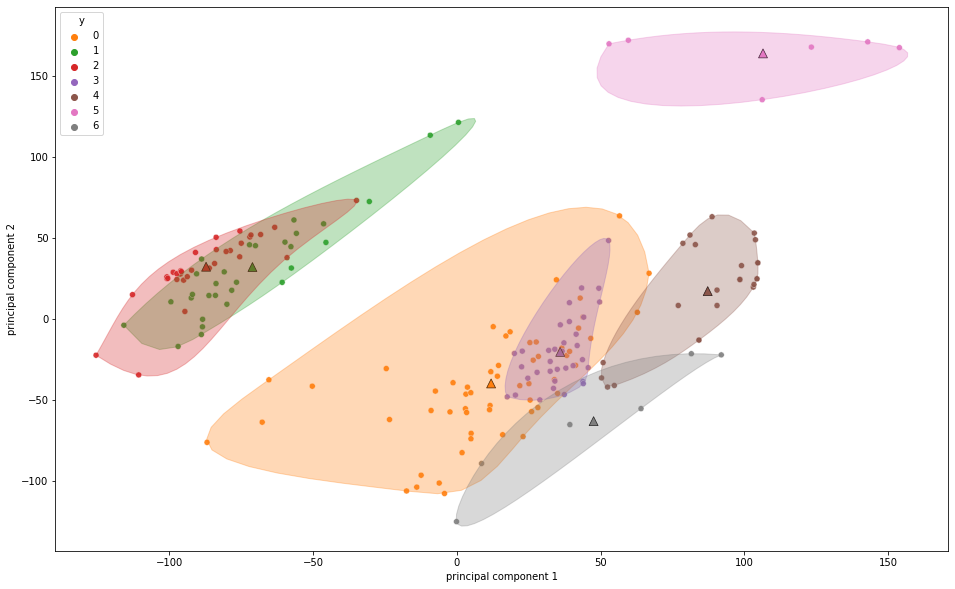

In [32]:
plt.figure(figsize=(16,10))
color_pal = sns.color_palette("tab10", len(clusters)+1)[1:8]
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=color_pal,
    data=df_reduced_AggClus,
    legend="full",
    alpha=0.9
)

ax = sns.scatterplot(x="principal component 1", y="principal component 2", 
                     hue="y", palette=color_pal, data=df_centroid_AggClus, 
                     s=80, ec='black', legend=False, ax=ax, marker='^', alpha=1)

for i in df_reduced_AggClus.y.unique():
    points = df_reduced_AggClus[df_reduced_AggClus.y == i][['principal component 1', 'principal component 2']].values
    
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)

    if i>=0:
      plt.fill(interp_x, interp_y, '--', alpha=0.3, color=color_pal[i])

plt.show()

              precision    recall  f1-score   support

           0       0.65      0.95      0.77        39
           1       1.00      0.97      0.98        31
           2       0.97      0.82      0.89        38
           3       1.00      1.00      1.00        34
           4       1.00      0.92      0.96        26
           5       0.00      0.00      0.00        15
           6       1.00      1.00      1.00         6

    accuracy                           0.86       189
   macro avg       0.80      0.81      0.80       189
weighted avg       0.84      0.86      0.84       189



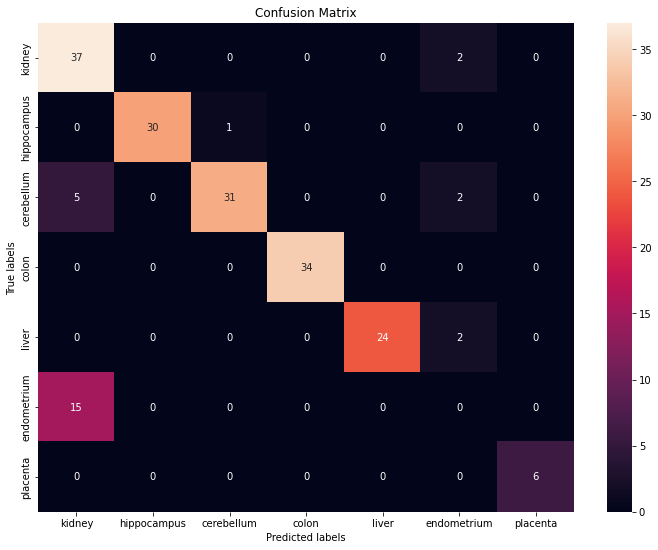

In [33]:
cm = confusion_matrix(y_test, yAggClus_2)
print(classification_report(y_test, yAggClus_2))

fig, ax= plt.subplots(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

ax.xaxis.set_ticklabels(['kidney','hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium' , 'placenta']); 
ax.yaxis.set_ticklabels(['kidney','hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium' , 'placenta']); 

In [34]:
score_dbsacn_s = silhouette_score(X_standardized, yAggClus_2, metric='euclidean')
score_dbsacn_d = davies_bouldin_score(X_standardized, yAggClus_2)
print('Silhouette Coefficient: %.4f' % score_dbsacn_s)
print('DB Index: %.4f' % score_dbsacn_d)

Silhouette Coefficient: 0.2261
DB Index: 1.5889


# 3. Reducir Complejidad usando Principal component analysis:

In [35]:
pca = PCA(0.9)
X_reduced = pca.fit_transform(X_standardized)
n_components = pca.n_components_

In [36]:
pca_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var_dif = np.round(pca.explained_variance_ratio_, decimals=4)*100
print('Variacion individual de {} principal components:'.format(n_components))
print('{}'.format(np.round(pca.explained_variance_ratio_, decimals=4)*100))
print('Variacion acumulada de {} principal components:'.format(n_components))
print('{}'.format(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)))

Variacion individual de 71 principal components:
[19.51 12.33  9.3   6.73  4.98  4.15  3.46  2.2   1.98  1.71  1.55  1.22
  1.18  1.    0.89  0.82  0.8   0.67  0.64  0.6   0.57  0.54  0.49  0.48
  0.45  0.43  0.42  0.41  0.39  0.38  0.36  0.35  0.35  0.33  0.33  0.31
  0.31  0.3   0.29  0.29  0.28  0.27  0.27  0.26  0.25  0.25  0.24  0.24
  0.23  0.23  0.23  0.22  0.22  0.22  0.21  0.21  0.2   0.2   0.2   0.2
  0.19  0.19  0.19  0.19  0.18  0.18  0.18  0.17  0.17  0.17  0.17]
Variacion acumulada de 71 principal components:
[19.51 31.84 41.14 47.87 52.85 57.   60.46 62.66 64.64 66.35 67.9  69.12
 70.3  71.3  72.19 73.01 73.81 74.48 75.12 75.72 76.29 76.83 77.32 77.8
 78.25 78.68 79.1  79.51 79.9  80.28 80.64 80.99 81.34 81.67 82.   82.31
 82.62 82.92 83.21 83.5  83.78 84.05 84.32 84.58 84.83 85.08 85.32 85.56
 85.79 86.02 86.25 86.47 86.69 86.91 87.12 87.33 87.53 87.73 87.93 88.13
 88.32 88.51 88.7  88.89 89.07 89.25 89.43 89.6  89.77 89.94 90.11]


In [37]:
X_reduced

array([[  4.98919233, -70.90596462,  26.73909576, ...,  -0.69246519,
         -0.61136263,  10.71570215],
       [ 23.0598108 , -72.89850548,  17.80458944, ...,  13.54972547,
          0.86749789,  -1.85073404],
       [ 36.55742584, -18.22002691,  40.39809547, ...,   3.25564241,
          2.67983128,  -1.62725956],
       ...,
       [ 64.08570244, -55.61360293,  16.83583267, ...,   1.95019521,
         -0.33605277,  -0.16047261],
       [ 81.58783591, -21.72203934,  21.24747056, ...,  -1.96563167,
          1.88342273,  -0.38578526],
       [ 92.00688671, -22.45069167,  20.31594226, ...,  -0.54148733,
         -1.09254086,   0.61309628]])

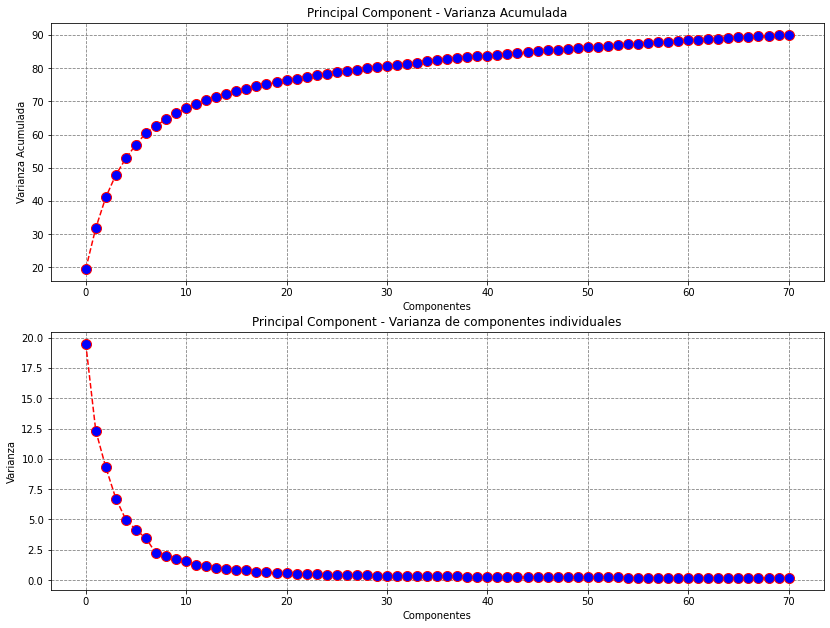

In [38]:
fig_var, axs_var = plt.subplots(2, 1,figsize=(12,9))
fig_var.tight_layout(pad=3.0)

axs_var[0].plot(pca_var, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[0].set_title('Principal Component - Varianza Acumulada')
axs_var[0].set_xlabel('Componentes')
axs_var[0].set_ylabel('Varianza Acumulada')
axs_var[0].yaxis.grid(color='gray', linestyle='dashed')
axs_var[0].xaxis.grid(color='gray', linestyle='dashed')

axs_var[1].plot(var_dif, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[1].set_title('Principal Component - Varianza de componentes individuales')
axs_var[1].set_xlabel('Componentes')
axs_var[1].set_ylabel('Varianza')
axs_var[1].yaxis.grid(color='gray', linestyle='dashed')
axs_var[1].xaxis.grid(color='gray', linestyle='dashed')



In [39]:
X_principal = X_reduced

 ## 2) Implementar GMM

In [54]:
import numpy as np
from scipy.stats import multivariate_normal
random.seed(1811)

class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [  X[row_index,:] for row_index in random_row ]
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
    
    def m_step(self, X):
        # M-Step: update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)

    def fit(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i], 
                cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

In [55]:
pca_cx = PCA(n_components=5)
X_reduced_c5 = pca_cx.fit_transform(X_standardized)
X_reduced_gmm = np.array(X_reduced_c5)

In [61]:
min_maxiter= 1
max_maxiter= 18
clusters = []
accuracy = []
silhouette = []
db =[]

for i in range(min_maxiter, max_maxiter):
  print(i)
  gmm = GMM(k=7, max_iter=i)
  gmm.fit(X_reduced_gmm)
  y_gmm = gmm.predict(X_reduced_gmm)
  clusters.append(len(np.unique(y_gmm)))
  accuracy.append(accuracy_score(y_test, y_gmm))
  y_pred = np.array([original_cluster_ids[gmm_cluster_ids[yi]] for yi in y_gmm])

  if len(np.unique(y_pred))>1:
    score_silh = silhouette_score(X_reduced_gmm, y_pred, metric='euclidean')
    score_db = davies_bouldin_score(X_reduced_gmm, y_pred)
  else:
    score_silh = -1
    score_db = 0

  silhouette.append(score_silh)
  db.append(score_db)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


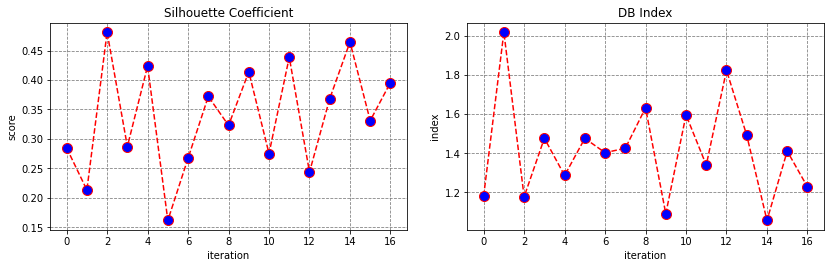

In [123]:
fig_var, axs_var = plt.subplots(1, 2,figsize=(12,4))
fig_var.tight_layout(pad=3.0)

axs_var[0].plot(silhouette, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[0].set_title('Silhouette Coefficient')
axs_var[0].set_xlabel('iteration')
axs_var[0].set_ylabel('score')
axs_var[0].yaxis.grid(color='gray', linestyle='dashed')
axs_var[0].xaxis.grid(color='gray', linestyle='dashed')

axs_var[1].plot(db, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
axs_var[1].set_title('DB Index')
axs_var[1].set_xlabel('iteration')
axs_var[1].set_ylabel('index')
axs_var[1].yaxis.grid(color='gray', linestyle='dashed')
axs_var[1].xaxis.grid(color='gray', linestyle='dashed')


In [71]:
gmm = GMM(k=7, max_iter=14)
gmm.fit(X_reduced_gmm)

In [72]:
y_gmm = gmm.predict(X_reduced_c5)

In [93]:
#Uniformizar clusters ID
original_cluster_ids = {"kidney": 0, "hippocampus": 1, "cerebellum": 2, "colon": 3, "liver": 4, "endometrium": 5, "placenta": 6}
gmm_cluster_ids = {3: "liver", 5: "kidney", 0: "placenta", 6: "colon", 4: "endometrium", 1: "cerebellum", 2: "hippocampus"}
y_gmm_updated = np.array([original_cluster_ids[gmm_cluster_ids[yi]] for yi in y_gmm])

In [82]:
df_compare = pd.DataFrame(y_gmm_updated)
df_compare["test"] = y_test

In [98]:
df_compare

,0,test
0,5,0
1,5,0
2,5,0
3,5,0
4,5,0
...,...,...
184,6,6
185,3,6
186,3,6
187,3,6


In [99]:
n_components=2
pca_c2 = PCA(n_components=n_components)
X_reduced_c2 = pca_c2.fit_transform(X_standardized)

In [100]:
df_reduced = pd.DataFrame(data = X_reduced_c2, columns = ['principal component 1', 'principal component 2'])
df_reduced["y"] = y_gmm_updated

In [101]:
#calculate centroids
df_centroid = pd.DataFrame()
for i in np.unique(y_gmm_updated):
  points_of_cluster_0 = df_reduced[df_reduced["y"]==i]
  centroid_of_cluster_0 = np.mean(points_of_cluster_0, axis=0) 
  dfc = pd.DataFrame(centroid_of_cluster_0)
  dfc = dfc.T
  dfc["y"] = int(dfc["y"])
  df_centroid = pd.concat([df_centroid,dfc])

print(df_centroid)

   principal component 1  principal component 2  y
0              10.567966             -41.391114  0
0             -68.438948              32.554351  1
0             -89.676946              25.198369  2
0              33.100479             -25.432118  3
0              84.404377               0.084602  4
0              73.301215             109.164757  5
0             -25.432827              15.306141  6


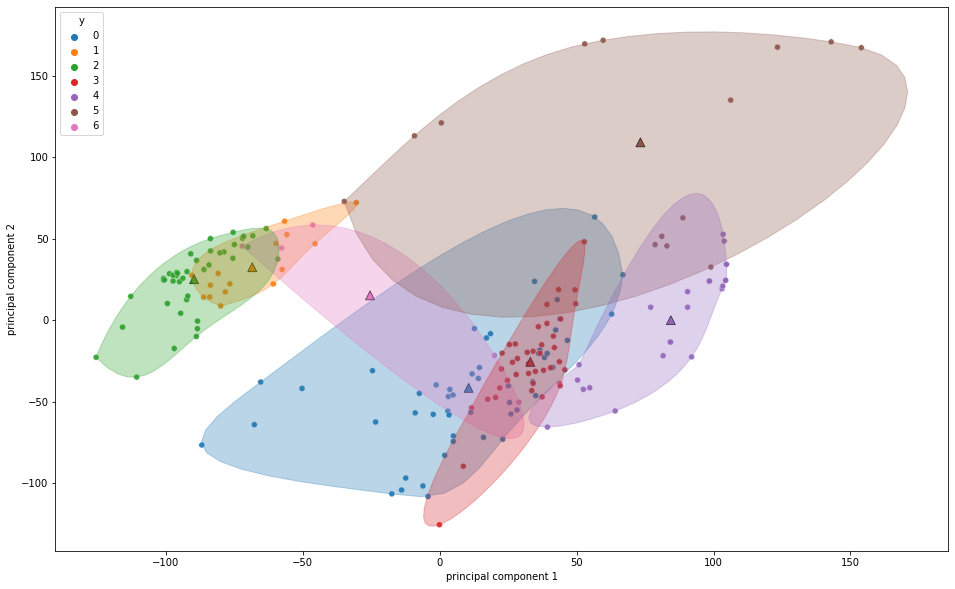

In [124]:
plt.figure(figsize=(16,10))
color_pal = sns.color_palette("tab10", len(np.unique(y_gmm)))
ax = sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=color_pal,
    data=df_reduced,
    legend="full",
    alpha=0.9
)

ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="y", palette=color_pal, data=df_centroid, s=80, ec='black', legend=False, ax=ax, marker='^', alpha=1)

for i in df_reduced.y.unique():
    points = df_reduced[df_reduced.y == i][['principal component 1', 'principal component 2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)

    # Se valida que no agrupe a los valores sin cluster
    if i>=0:
      plt.fill(interp_x, interp_y, '--', alpha=0.3, color=color_pal[i])

plt.show()

              precision    recall  f1-score   support

           0       0.73      0.95      0.82        39
           1       1.00      0.48      0.65        31
           2       0.73      0.79      0.76        38
           3       0.80      0.94      0.86        34
           4       0.83      0.73      0.78        26
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00         6

    accuracy                           0.70       189
   macro avg       0.58      0.56      0.55       189
weighted avg       0.72      0.70      0.69       189



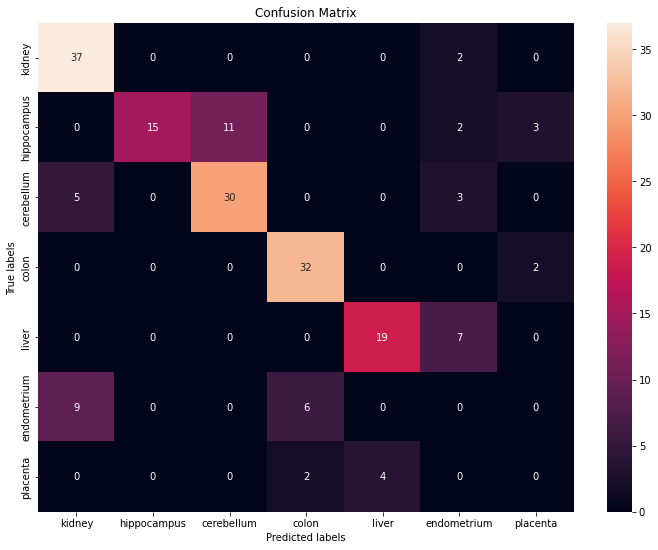

In [125]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_gmm_updated)
print(classification_report(y_test, y_gmm_updated))

fig, ax= plt.subplots(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

ax.xaxis.set_ticklabels(['kidney','hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium' , 'placenta']); 
ax.yaxis.set_ticklabels(['kidney','hippocampus', 'cerebellum', 'colon', 'liver', 'endometrium' , 'placenta']); 


In [126]:
score_dbsacn_s = silhouette_score(X_reduced_gmm, y_gmm_updated, metric='euclidean')
score_dbsacn_d = davies_bouldin_score(X_reduced_gmm, y_gmm_updated)
print('Silhouette Coefficient: %.4f' % score_dbsacn_s)
print('DB Index: %.4f' % score_dbsacn_d)

Silhouette Coefficient: 0.3611
DB Index: 1.2077
